In [1]:
#pip install TextBlob

In [2]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
import psycopg2
import pyodbc


In [3]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [4]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_dbSentimentData = SqlConn.fetchTweetFinance()
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [5]:
df_dbSentimentData

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67.0,5.524000,3359000
1,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51.0,5.650000,3646500
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43.0,5.320000,23258000
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14.0,5.320000,23258000
4,168022238061268993,tesla,2012-02-10,Tesla Model X video,12.0,16,47.0,6.220000,9371000
...,...,...,...,...,...,...,...,...,...
1103,1549288086944845825,tesla,2022-07-19,Please vote your shares with Tesla!,NaN,34346,NaN,736.590027,26963400
1104,1549422655656275968,tesla,2022-07-19,Congrats to Tesla Fremont + Giga Nevada for ma...,NaN,113889,NaN,736.590027,26963400
1105,1549423649463181312,tesla,2022-07-19,To think that Fremont was just a derelict buil...,NaN,38909,NaN,736.590027,26963400
1106,1549440612021243906,tesla,2022-07-19,Teslas are the most made-in-USA vehicles,NaN,46082,NaN,736.590027,26963400


In [6]:
# Read the csv files containin the tweets by Eon Musk from 2010 to 2022 for DogeCOin, Tesla, spaceX, twitter.
#df_doge = pd.read_csv('../Data_Resources/scrapped_data/doge_tweets.csv')
#df_spaceX = pd.read_csv('../Data_Resources/scrapped_data/spaceX_tweets.csv')
#df_tesla = pd.read_csv('../Data_Resources/scrapped_data/tesla_tweets.csv')
#df_twitter = pd.read_csv('../Data_Resources/scrapped_data/twitter_tweets.csv')

In [7]:
df_doge = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'doge']
df_tesla = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'tesla']
df_twitter = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'twitter']

In [8]:
df_doge

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
473,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428.0,0.002795,60298362
474,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539.0,0.002795,60298362
475,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959.0,0.002795,60298362
641,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207.0,0.002142,229810398
681,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775.0,0.003061,74705371
...,...,...,...,...,...,...,...,...,...
1073,1530209049261658112,doge,2022-05-27,"Tesla merch can be bought with Doge, soon Spac...",NaN,203072,NaN,0.081335,1310057650
1081,1531696049064116225,doge,2022-05-31,And Palmer always forgets to mention that he n...,NaN,3650,NaN,0.085865,672444588
1082,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,NaN,12148,NaN,0.085865,672444588
1093,1538406040374595585,doge,2022-06-19,I will keep supporting Dogecoin,NaN,396094,NaN,0.060396,1166163984


In [9]:
print(f"shape of doge df: " + str(df_doge.shape))
print(f"shape of tesla df: " + str(df_tesla.shape))
print(f"shape of twitter df: " + str(df_twitter.shape))

shape of doge df: (75, 9)
shape of tesla df: (937, 9)
shape of twitter df: (96, 9)


In [10]:
df_doge.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
473,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428.0,0.002795,60298362
474,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539.0,0.002795,60298362
475,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959.0,0.002795,60298362
641,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207.0,0.002142,229810398
681,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775.0,0.003061,74705371


In [11]:
df_tesla.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67.0,5.524,3359000
1,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51.0,5.650,3646500
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43.0,5.320,23258000
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14.0,5.320,23258000
4,168022238061268993,tesla,2012-02-10,Tesla Model X video,12.0,16,47.0,6.220,9371000


In [12]:
df_twitter.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
119,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208.0,36.599998,9861800
145,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41.0,17.139999,15718000
167,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598.0,23.520000,22230700
168,783842202220802048,twitter,2016-10-05,"Yeah, and several others at various times. My ...",20.0,225,16.0,24.870001,63716800
242,943901463998169088,twitter,2017-12-21,I love Twitter,5637.0,169609,31496.0,25.049999,19597700


# Vader Sentiment Analyzer

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tamie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
vader = SentimentIntensityAnalyzer()

In [15]:
df_doge_vader = df_doge.copy()
df_tesla_vader = df_tesla.copy()
df_twitter_vader = df_twitter.copy()

In [16]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_doge_vader["compound_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_doge_vader["negative_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_doge_vader["neutral_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_doge_vader["positive_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_doge_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
473,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428.0,0.002795,60298362,0.8176,0.0,0.414,0.586
474,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539.0,0.002795,60298362,0.0000,0.0,1.000,0.000
475,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959.0,0.002795,60298362,0.3400,0.0,0.556,0.444
641,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207.0,0.002142,229810398,0.0000,0.0,1.000,0.000
681,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775.0,0.003061,74705371,0.1511,0.0,0.715,0.285


In [17]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_tesla_vader["compound_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_tesla_vader["negative_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_tesla_vader["neutral_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_tesla_vader["positive_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_tesla_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
0,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67.0,5.524,3359000,0.6616,0.000,0.826,0.174
1,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51.0,5.650,3646500,0.0000,0.000,1.000,0.000
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43.0,5.320,23258000,-0.0772,0.122,0.732,0.146
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14.0,5.320,23258000,0.0875,0.138,0.665,0.197
4,168022238061268993,tesla,2012-02-10,Tesla Model X video,12.0,16,47.0,6.220,9371000,0.0000,0.000,1.000,0.000


In [18]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_twitter_vader["compound_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_twitter_vader["negative_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_twitter_vader["neutral_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_twitter_vader["positive_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_twitter_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
119,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208.0,36.599998,9861800,0.6369,0.0,0.741,0.259
145,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41.0,17.139999,15718000,0.6696,0.0,0.308,0.692
167,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598.0,23.520000,22230700,0.0000,0.0,1.000,0.000
168,783842202220802048,twitter,2016-10-05,"Yeah, and several others at various times. My ...",20.0,225,16.0,24.870001,63716800,0.2960,0.0,0.891,0.109
242,943901463998169088,twitter,2017-12-21,I love Twitter,5637.0,169609,31496.0,25.049999,19597700,0.6369,0.0,0.192,0.808


### Sentiment Analysis by TextBlob

In [19]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [20]:
#Make a copy of the df_doge df
df_doge_txtblb = df_doge.copy()

# Create 2 new columns
df_doge_txtblb["subjectivity"] = df_doge_txtblb["fullText"].apply(getSubjectivity)
df_doge_txtblb["polarity"] = df_doge_txtblb["fullText"].apply(getPolarity)
df_doge_txtblb['Sentiment'] = df_doge_txtblb['polarity'].apply(getAnalysis)
df_doge_txtblb.head()
df_doge_txtblb.to_csv("filename.csv")

In [21]:
df_doge_txtblb["Sentiment"].value_counts()

Neutral     47
Positive    22
Negative     6
Name: Sentiment, dtype: int64

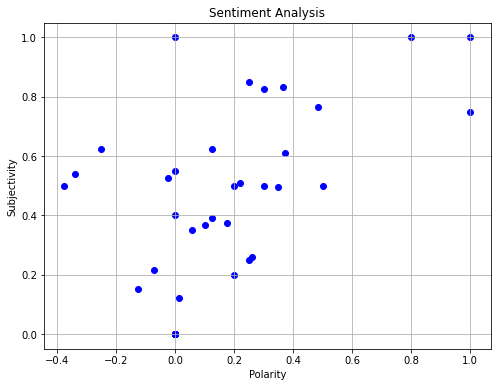

In [22]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_doge_txtblb["polarity"],df_doge_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [23]:
#Make a copy of the df_tesla df
df_tesla_txtblb = df_tesla.copy()

# Create 2 new columns
df_tesla_txtblb["subjectivity"] = df_tesla_txtblb["fullText"].apply(getSubjectivity)
df_tesla_txtblb["polarity"] = df_tesla_txtblb["fullText"].apply(getPolarity)
df_tesla_txtblb['Sentiment'] = df_tesla_txtblb['polarity'].apply(getAnalysis)
df_tesla_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
0,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,32.0,315,67.0,5.524,3359000,0.650000,0.350,Positive
1,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51.0,5.650,3646500,0.333333,0.250,Positive
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43.0,5.320,23258000,0.435000,0.150,Positive
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14.0,5.320,23258000,0.500000,0.175,Positive
4,168022238061268993,tesla,2012-02-10,Tesla Model X video,12.0,16,47.0,6.220,9371000,0.000000,0.000,Neutral


In [24]:
df_tesla_txtblb["Sentiment"].value_counts()

Positive    540
Neutral     248
Negative    149
Name: Sentiment, dtype: int64

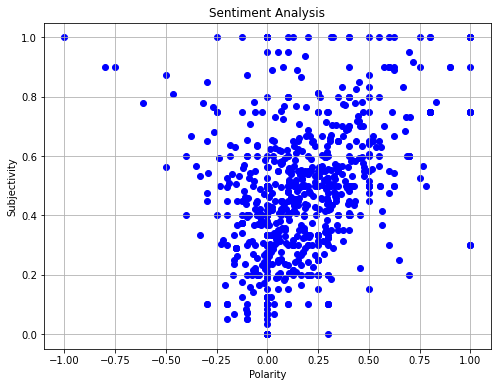

In [25]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_tesla_txtblb["polarity"],df_tesla_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [26]:
#Make a copy of the df_twitter df
df_twitter_txtblb = df_twitter.copy()

# Create 2 new columns
df_twitter_txtblb["subjectivity"] = df_twitter_txtblb["fullText"].apply(getSubjectivity)
df_twitter_txtblb["polarity"] = df_twitter_txtblb["fullText"].apply(getPolarity)
df_twitter_txtblb['Sentiment'] = df_twitter_txtblb['polarity'].apply(getAnalysis)
df_twitter_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
119,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208.0,36.599998,9861800,0.366667,0.333333,Positive
145,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41.0,17.139999,15718000,0.600000,0.500000,Positive
167,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598.0,23.520000,22230700,0.125000,0.000000,Neutral
168,783842202220802048,twitter,2016-10-05,"Yeah, and several others at various times. My ...",20.0,225,16.0,24.870001,63716800,0.262963,-0.051852,Negative
242,943901463998169088,twitter,2017-12-21,I love Twitter,5637.0,169609,31496.0,25.049999,19597700,0.600000,0.500000,Positive


In [27]:
df_twitter_txtblb["Sentiment"].value_counts()

Positive    54
Neutral     30
Negative    12
Name: Sentiment, dtype: int64

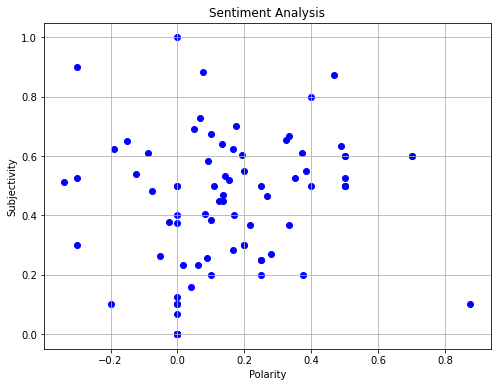

In [28]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_twitter_txtblb["polarity"],df_twitter_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [29]:
df_dbSentimentData_Combine = pd.concat([df_doge_vader,df_tesla_vader,df_twitter_vader],ignore_index=False)
df_dbSentimentData_Combine.rename(columns = {'Sentiment':'sentiment','compound_sc':'sentimentScore'} ,inplace=True)

In [30]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
473,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428.0,0.002795,60298362,0.8176,0.000,0.414,0.586
474,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539.0,0.002795,60298362,0.0000,0.000,1.000,0.000
475,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959.0,0.002795,60298362,0.3400,0.000,0.556,0.444
641,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207.0,0.002142,229810398,0.0000,0.000,1.000,0.000
681,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775.0,0.003061,74705371,0.1511,0.000,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1531632887866576904,twitter,2022-05-31,My kids wrote better code when they were 12 th...,NaN,7498,NaN,39.599998,11579000,0.9192,0.045,0.695,0.260
1080,1531640532350513155,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be...",NaN,3284,NaN,39.599998,11579000,0.4404,0.000,0.828,0.172
1089,1534938078279880706,twitter,2022-06-09,Only Twitter,NaN,57122,NaN,39.529999,7970300,0.0000,0.000,1.000,0.000
1094,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite differ...,NaN,147001,NaN,38.910000,16902200,0.5530,0.000,0.691,0.309


In [31]:
df_sentiment_tostore = df_dbSentimentData_Combine[["tweetID","date","adjustedClose","volume","sentimentScore"]]

In [32]:
#Insert Sentiment data
try:
    SqlConn.insertSentiment(df_sentiment_tostore)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [33]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
473,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428.0,0.002795,60298362,0.8176,0.000,0.414,0.586
474,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539.0,0.002795,60298362,0.0000,0.000,1.000,0.000
475,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959.0,0.002795,60298362,0.3400,0.000,0.556,0.444
641,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192,207.0,0.002142,229810398,0.0000,0.000,1.000,0.000
681,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930,775.0,0.003061,74705371,0.1511,0.000,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1531632887866576904,twitter,2022-05-31,My kids wrote better code when they were 12 th...,NaN,7498,NaN,39.599998,11579000,0.9192,0.045,0.695,0.260
1080,1531640532350513155,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be...",NaN,3284,NaN,39.599998,11579000,0.4404,0.000,0.828,0.172
1089,1534938078279880706,twitter,2022-06-09,Only Twitter,NaN,57122,NaN,39.529999,7970300,0.0000,0.000,1.000,0.000
1094,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite differ...,NaN,147001,NaN,38.910000,16902200,0.5530,0.000,0.691,0.309
